In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [9]:
movies = pd.read_csv('./data/tmdb_5000_movies.csv')

In [10]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [21]:
x = movies.iloc[0] #first row

In [22]:
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [23]:
x['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [24]:
x['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [20]:
x['overview']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [25]:
j = json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [26]:
' '.join(''.join(jj['name'].split(' ')) for jj in j)

'Action Adventure Fantasy ScienceFiction'

In [27]:
def get_list(x):
    j = json.loads(x)
    return ' '.join(''.join(jj['name'].split(' ')) for jj in j)

In [31]:
#alternatively
def genres_and_keywords_to_string(x):
    genres = json.loads(x['genres'])
    genres = ' '.join(''.join(j['name'].split(' ')) for j in genres)
    
    keywords = json.loads(x['keywords'])
    keywords = ' '.join(''.join(j['name'].split(' ')) for j in keywords)
    return "%s %s" % (genres, keywords)

In [32]:
get_list(x['keywords'])

'cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d'

In [35]:
movies["string"] = movies.apply(genres_and_keywords_to_string, axis=1)

In [38]:
movies["string"]

0       Action Adventure Fantasy ScienceFiction cultur...
1       Adventure Fantasy Action ocean drugabuse exoti...
2       Action Adventure Crime spy basedonnovel secret...
3       Action Crime Drama Thriller dccomics crimefigh...
4       Action Adventure ScienceFiction basedonnovel m...
                              ...                        
4798    Action Crime Thriller unitedstates–mexicobarri...
4799                                      Comedy Romance 
4800    Comedy Drama Romance TVMovie date loveatfirsts...
4801                                                     
4802      Documentary obsession camcorder crush dreamgirl
Name: string, Length: 4803, dtype: object

In [43]:
#Create a TF-IDF vectorizer object
tfidf = TfidfVectorizer(max_features=2000) #to limit the number of columns

In [44]:
#create a data matrix
tfidf_matrix = tfidf.fit_transform(movies["string"])


In [45]:
tfidf_matrix.shape

(4803, 2000)

In [46]:
tfidf_matrix

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [47]:
#mapping. title to index
movie2idx = {movie: i for i, movie in enumerate(list(movies['title']))}
movie2idx

{'Avatar': 0,
 "Pirates of the Caribbean: At World's End": 1,
 'Spectre': 2,
 'The Dark Knight Rises': 3,
 'John Carter': 4,
 'Spider-Man 3': 5,
 'Tangled': 6,
 'Avengers: Age of Ultron': 7,
 'Harry Potter and the Half-Blood Prince': 8,
 'Batman v Superman: Dawn of Justice': 9,
 'Superman Returns': 10,
 'Quantum of Solace': 11,
 "Pirates of the Caribbean: Dead Man's Chest": 12,
 'The Lone Ranger': 13,
 'Man of Steel': 14,
 'The Chronicles of Narnia: Prince Caspian': 15,
 'The Avengers': 16,
 'Pirates of the Caribbean: On Stranger Tides': 17,
 'Men in Black 3': 18,
 'The Hobbit: The Battle of the Five Armies': 19,
 'The Amazing Spider-Man': 20,
 'Robin Hood': 21,
 'The Hobbit: The Desolation of Smaug': 22,
 'The Golden Compass': 23,
 'King Kong': 24,
 'Titanic': 25,
 'Captain America: Civil War': 26,
 'Battleship': 27,
 'Jurassic World': 28,
 'Skyfall': 29,
 'Spider-Man 2': 30,
 'Iron Man 3': 31,
 'Alice in Wonderland': 32,
 'X-Men: The Last Stand': 33,
 'Monsters University': 34,
 'Tra

In [50]:
idx = movie2idx['Pirates of the Caribbean: At World\'s End']
idx

1

In [51]:
query = tfidf_matrix[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [52]:
#query vector
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [53]:
#similarity between query and every vector in tfidf_matrix
scores = cosine_similarity(tfidf_matrix, query)
scores

array([[0.03456117],
       [1.        ],
       [0.03875415],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [54]:
#1 x N array to 1-D array
scores = scores.flatten()

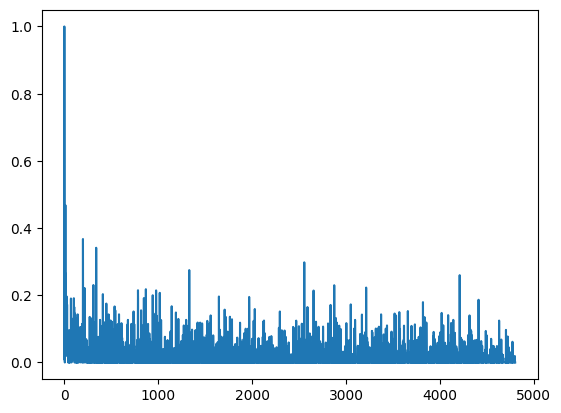

In [55]:
plt.plot(scores)

In [60]:
(-scores).argsort() #we don't care about the score values, only its rank among all movies

array([   1,   12,  199, ..., 2397, 2382, 4802], dtype=int64)

In [59]:
(-scores). argsort()

array([   1,   12,  199, ..., 2397, 2382, 4802], dtype=int64)

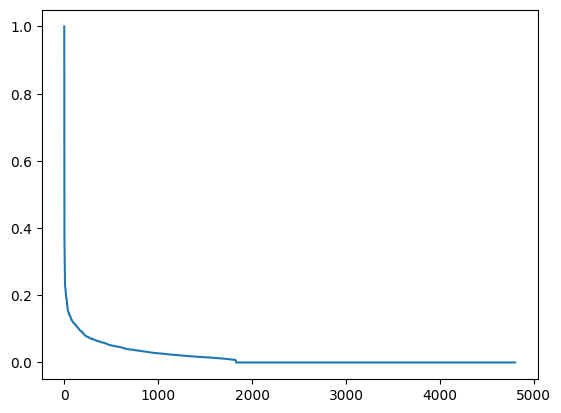

In [62]:
plt.plot(scores[(-scores).argsort()]) #approximately 2000 similar movies but others are not similar because they are 0


In [65]:
recommended_idx = (-scores).argsort()[1:11] #top 10 similar movies excluding the query movie

In [67]:
#indices to titles
movies["title"].iloc[recommended_idx]

12             Pirates of the Caribbean: Dead Man's Chest
199     Pirates of the Caribbean: The Curse of the Bla...
340                                      Cutthroat Island
2556                                   The Princess Bride
1331                                         Nim's Island
17            Pirates of the Caribbean: On Stranger Tides
4211                                  Mississippi Mermaid
310                               In the Heart of the Sea
2875                                           Two Lovers
3215                                          Shipwrecked
Name: title, dtype: object

In [69]:
#automate the process
def recommend(movie):
    idx = movie2idx[movie]
    query = tfidf_matrix[idx]
    scores = cosine_similarity(tfidf_matrix, query)
    scores = scores.flatten()
    recommended_idx = (-scores).argsort()[1:11]
    return movies["title"].iloc[recommended_idx]    

In [70]:
print(f"Recommendations for Avatar: '{recommend('Avatar')}'")


Recommendations for Avatar: '47         Star Trek Into Darkness
3214                    Barbarella
1287            A Monster in Paris
61               Jupiter Ascending
3730                         Cargo
3405    Stargate: The Ark of Truth
260                   Ender's Game
2403                        Aliens
838                         Alien³
1201                     Predators
Name: title, dtype: object'


In [75]:
print("Recommendations for Corpse Bride:")
print(recommend("Corpse Bride"))
#better display

Recommendations for Corpse Bride:
1293                      Frankenweenie
3402                     The Snow Queen
2272                            Dwegons
874                           Anastasia
2114               Return to Never Land
4643                         Like Crazy
605     Legends of Oz: Dorothy's Return
1246                  Quest for Camelot
3059                      Teacher's Pet
1587       The Curse of the Were-Rabbit
Name: title, dtype: object
